# Activity 10: Sine Series Problem + Error Analysis

* *Computational Physics*: Ch 2.5


## Problem: Summing Series: sin(x)

Evaluate the $\sin$ function from its series representation
$$
\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \dots
$$

### Explicit sum
A naive algorithm is to sum the series up to the $N$th term:
$$
\sin x \approx \sum_{n=1}^N \frac{(-1)^{n-1} x^{2n-1}}{(2n - 1)!}
$$

Problems:

- How to decide when to stop summing?
- Division of large terms (overflows!)
- Powers and factorials are very expensive to compute.

### Recursive sum
Better approach: Build up series terms $a_n$ using previous term $a_{n-1}$ through a recursion:

\begin{align}
a_n &= a_{n-1} \times q_n\\
a_n &= \frac{(-1)^{n-1} x^{2n-1}}{(2n - 1)!} = \frac{(-1)^{n-2} x^{2n-3}}{(2n - 3)!} \frac{-x^2}{(2n - 1)(2n - 2)}\\
a_n & = a_{n-1} \frac{-x^2}{(2n - 1)(2n - 2)}
\end{align}

Accuracy of this approach? Not clear in absolute terms but we can make the assumption that the error is approximately the last term in the sum, $a_N$. Hence we can strive to make the relative error smaller than the machine precision
$$
\left| \frac{a_N}{\sum_{n=1}^N a_n} \right| < \epsilon_m
$$



## Task

In file `series.py` implement a function `sin_recursive(x, N=100, eps=1e-16)` that 
* computes $\sin(x)$ using the **Recursive sum** approach using $N$ iterations
* returns the value of $\sin(x)$ 



## Evaluation and plotting 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import your `series.py` as a module:

In [2]:
import series

NOTE: If you changed code in `series` you will need to **reload the module**: execute the following cell whenever you changed `series.py`.

In [3]:
from importlib import reload
reload(series)

<module 'series' from '/Volumes/ASU/oliver/Documents/Teaching/ASU/CompPhys_PHY494/2021/Classroom/classroom-generator/Participation/activity_10_sine_series/erroranalysis/series.py'>

Test the implementation against the "exact" numpy function `np.sin()` and show the relative error as a function of $1 \le N < 1000$.

Report and plot
1. Try out `x =` $\pi/3, 2\pi, 7.89\pi, -12.3\pi, 14.78\pi$
2. relative error `abs(sin_series(x) - sin(x))/abs(sin(x))` as function of $N$


In [11]:
x_values = np.pi*np.array([1/3, 2, 7.89, -12.3, 14.78])
N_values = np.arange(1, 1000)

#### Testing code

Implementation of the error calculation against the numpy reference implementation `np.sin`:

In [39]:
def relerror_sin(N_values, x):
    relative_errors = []
    y0 = np.sin(x)
    y = np.array([series.sin_recursive(x, N=N) for N in N_values])
    delta = y - y0
    relative_error = np.abs(delta/y0)
    return relative_error

#### Analyze recursive implementation

In [48]:
r = relerror_sin(N_values, np.pi/3)

Text(0, 0.5, 'relative error')

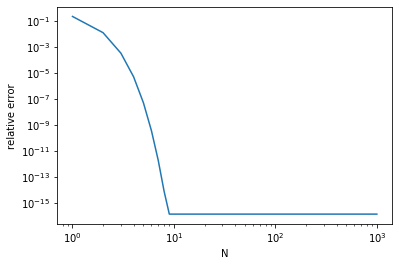

In [49]:
plt.loglog(N_values, r)
plt.xlabel("N")
plt.ylabel("relative error")

Plot all x values:

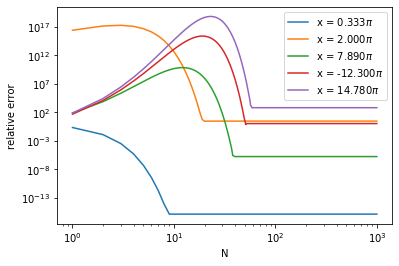

In [52]:
for x in x_values:
    r = relerror_sin(N_values, x)
    plt.loglog(N_values, r, label=f"x = {x/np.pi:.3f}" + r"$\pi$")
plt.xlabel("N")
plt.ylabel("relative error")
plt.legend()